In [111]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load From AWS Mongo

In [25]:
client = MongoClient()
db = client.yelp
db.list_collection_names()

['checkin', 'photo', 'review', 'user', 'tip', 'business']

In [51]:
reviews = list(db.review.find({}, {'_id':0, 'business_id': 1, 'stars': 1, 'text': 1, 'useful': 1, 'date': 1}))
len(reviews)

6685900

In [107]:
review_df = pd.DataFrame(reviews) 

In [109]:
review_df = review_df.rename(columns={'stars': 'review_stars'})
review_df.head()

,business_id,date,review_stars,text,useful
0,ikCg8xy5JIg_NGPx-MSIDA,2018-01-09 20:56:38,5.0,Went in for a lunch. Steak sandwich was delici...,0
1,eU_713ec6fTGNO4BegRaww,2013-01-20 13:25:59,4.0,I'll be the first to admit that I was not exci...,0
2,zvO-PJCpNk4fgAVUnExYAA,2010-10-05 19:12:35,1.0,This place has gone down hill. Clearly they h...,3
3,b2jN2mm9Wf3RcrZCgfo1cg,2015-01-18 14:04:18,2.0,I was really looking forward to visiting after...,1
4,oxwGyA17NL6c5t1Etg5WgQ,2012-02-29 21:52:43,3.0,It's a giant Best Buy with 66 registers. I do...,1


In [128]:
low_review_df = review_df[review_df.review_stars < 3.0]
low_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544553 entries, 2 to 6685899
Data columns (total 5 columns):
business_id     1544553 non-null object
date            1544553 non-null object
review_stars    1544553 non-null float64
text            1544553 non-null object
useful          1544553 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 70.7+ MB


In [52]:
businesses = list(db.business.find({}, {'_id':0, 'business_id': 1, 'name': 1, 'city': 1, 'state': 1,
                                     'stars': 1, 'review_count': 1, 'attributes': 1, 'categories': 1}))
len(businesses)

192609

In [53]:
businesses[0]

{'business_id': '1SWheh84yJXfytovILXOAQ',
 'name': 'Arizona Biltmore Golf Club',
 'city': 'Phoenix',
 'state': 'AZ',
 'stars': 3.0,
 'review_count': 5,
 'attributes': {'GoodForKids': 'False'},
 'categories': 'Golf, Active Life'}

#### Get All Businesses that are Restaurants

In [84]:
restaurants = [biz for biz in businesses if str(biz['categories']).find('Restaurants') != -1 ]
len(restaurants)

59371

In [89]:
restaurant_df = pd.DataFrame(restaurants)

,attributes,business_id,categories,city,name,review_count,stars,state
0,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,Taco Bell,18,3.0,AZ
1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,Marco's Pizza,16,4.0,OH
2,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,Carluccio's Tivoli Gardens,40,4.0,NV
3,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,Emerald Chinese Restaurant,128,2.5,ON
4,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,Marathon Diner,35,4.0,PA


In [141]:
restaurant_df = restaurant_df.rename(columns={'stars': 'biz_stars'})
restaurant_df.head()

,attributes,business_id,categories,city,name,review_count,biz_stars,state
0,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,Taco Bell,18,3.0,AZ
1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,Marco's Pizza,16,4.0,OH
2,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,Carluccio's Tivoli Gardens,40,4.0,NV
3,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,Emerald Chinese Restaurant,128,2.5,ON
4,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",Pittsburgh,Marathon Diner,35,4.0,PA


#### Business Star Distribution

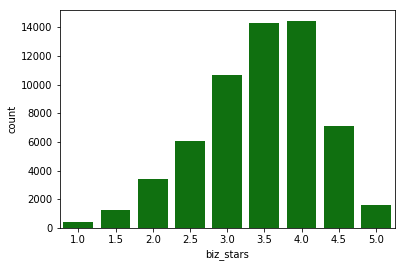

In [117]:
sns.countplot(restaurant_df.biz_stars, color='g');

## Merge Businesses and Reviews

In [155]:
merged = restaurant_df.merge(low_review_df, on='business_id', how='left')

In [167]:
merged.text[7]

"I'm super upset. I stopped on my way home because breadsticks sounded bomb. Well it would have been nice if I could even eat them. I would take them back but it's rush hour and not near my house. COMPLETELY BURNT! Like I can't even fathom the worker was like oh yeah the smell of\nBurnt bread and the black tops on these breadsticks were even passable for something you could give to a customer. Absolutely ridiculous."